In [9]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [10]:
# fetching the olivetti face data
# data is already normalized
olivetti_data = fetch_olivetti_faces()
# there are 400 images - 10x40 (40 people - 1 person has 10 Images)  1 img = 64x64 pixels
# feature's shape is 400, 4096 as images are already converted as 64x64
features = olivetti_data.data
# targets are already assigned integer values
targets = olivetti_data.target

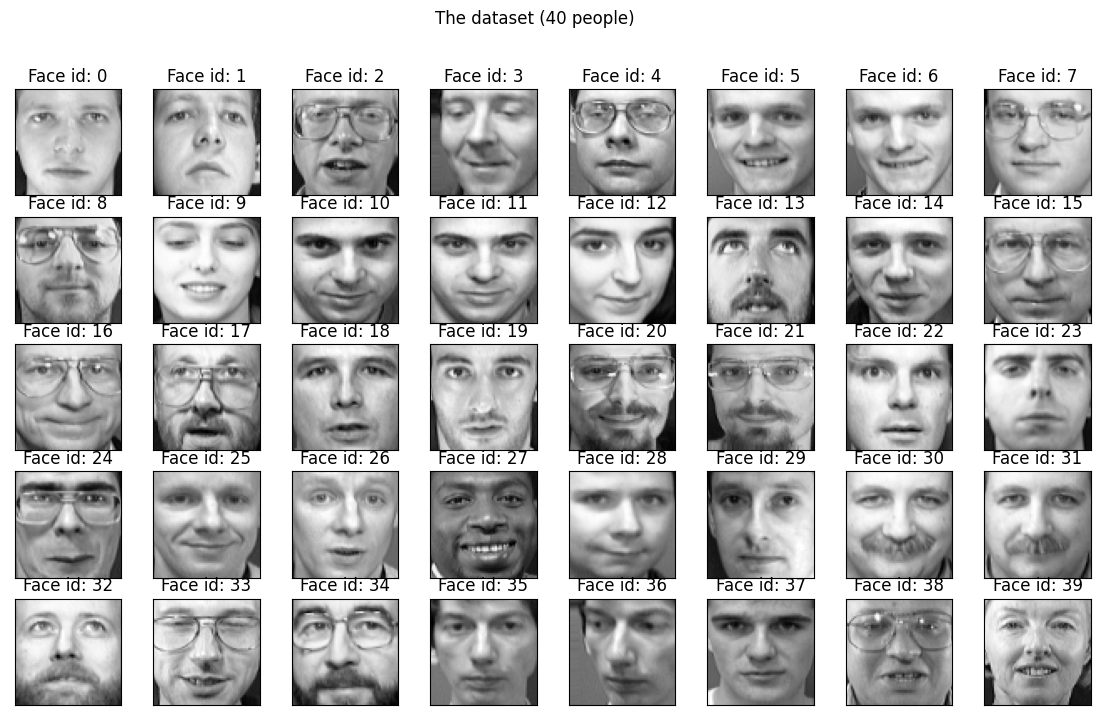

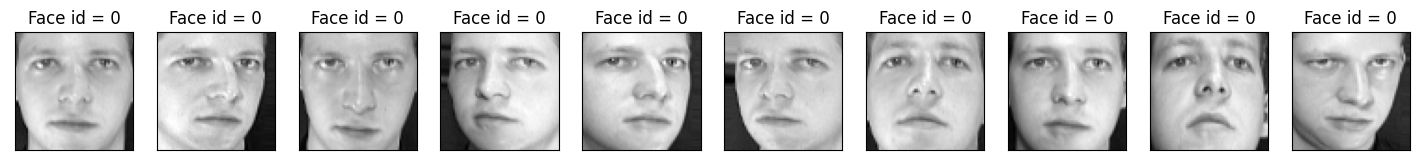

In [19]:
# visualizing the dataset Optional
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14, 8))
sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets) :
    image_index = unique_user_id*8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title("Face id: %s" % unique_user_id)

plt.suptitle("The dataset (40 people)")
plt.show()

# Now plotting the 10 images for the first person (face id = 0)
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(18, 9))

for j in range(10) :
    sub_plots[j].imshow(features[j].reshape(64, 64), cmap="gray")
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title("Face id = 0")

plt.show()


In [12]:
# Splitting the data in test and train data
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

In [13]:
# let's try to find the optimal number of eigenvectors (principle components)
# Reducing 4096 input features to around 100
'''''
pca = PCA()
pca.fit(features)

plt.figure(1)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()
# Plot shows that most of the info is stored in 10 to 15 components
'''''

"''\npca = PCA()\npca.fit(features)\n\nplt.figure(1)\nplt.plot(pca.explained_variance_, linewidth=2)\nplt.xlabel('Components')\nplt.ylabel('Explained Variances')\nplt.show()\n# Plot shows that most of the info is stored in 10 to 15 components\n"

In [14]:
# so we try pca with 100 components
# whitening when true multiply vectors component are multiple by square root
# of no. of samples and divided by singular values to ensure uncorrelated outputs
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
#for later cross validation use
X_pca = pca.fit_transform(features)
#  applying of dimensional reduction using Transform
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

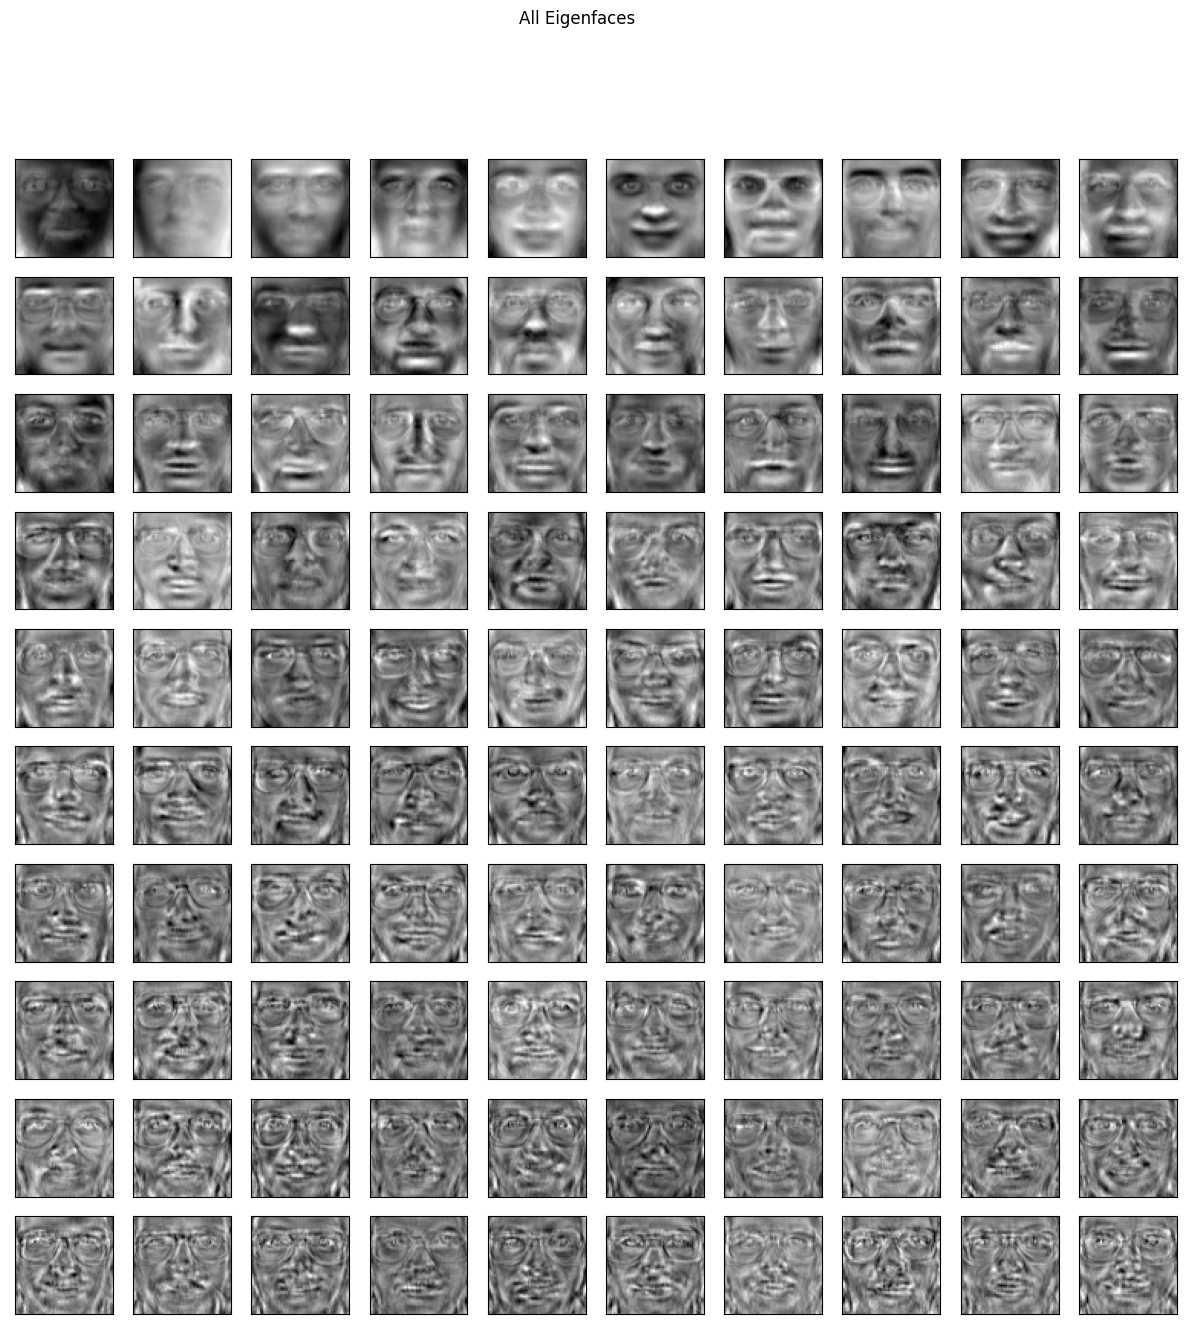

In [20]:
# after we find the optimal 100 PCA numbers we can check the 'eigenfaces'
# 1 principal component (eigenvector) has 4096 features

# Visualizing eigenfaces
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces) :
    sub_plots[i].imshow(eigen_faces[i], cmap="gray")
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])

plt.suptitle("All Eigenfaces")
plt.show()
# these eigenfaces represent every sample img
# As features are reduced from 4096 to 100 , so now these 100 features or 100 eigenfaces
# represent all the 400 images
# We can represent every original img as linear combination of all eigenfaces
# with different combination of coefficient


In [16]:
# Now Using the Models

models = [("Logistic Regression", LogisticRegression()),
          ("Support Vector Machine", SVC()),
          ("Naive Bayes Classifier", GaussianNB())]

In [17]:
for name, model in models :
    classifier_model = model
    classifier_model.fit(X_train_pca, Y_train)

    y_predicted = classifier_model.predict(X_test_pca)
    print("Result with %s" % name)
    print("Accuracy score: %s" % (metrics.accuracy_score(Y_test, y_predicted)))


Result with Logistic Regression
Accuracy score: 0.9
Result with Support Vector Machine
Accuracy score: 0.94
Result with Naive Bayes Classifier
Accuracy score: 0.88


In [18]:
#using Cross Validation
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, targets, cv=kfold)
    print("Mean of the Cross-validation Scores : %s" % cv_scores.mean())


Mean of the Cross-validation Scores : 0.925
Mean of the Cross-validation Scores : 0.8525
Mean of the Cross-validation Scores : 0.7575000000000001
